### Final Clean Notebook

In [2]:
# To call the modeul need to set-up the path
import sys
import os

# Add the 'src' directory to Python path
sys.path.append(os.path.abspath('/Users/artatrana/Documents/MyJupyterPalybook/MyDataAnalysisProjects'))




In [4]:
from py_util.data_dwonload import get_fremont_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')
%matplotlib inline

bdata = get_fremont_data()

/var/folders/kp/v2w000cd4y912bvfj4n251_m0000gn/T/ipykernel_22419/2719774844.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
# Step 2: Conduct Pivot Table on Data
pivoted = bdata.pivot_table('Total', index=bdata.index.time, columns=bdata.index.date)

<Axes: xlabel='time'>

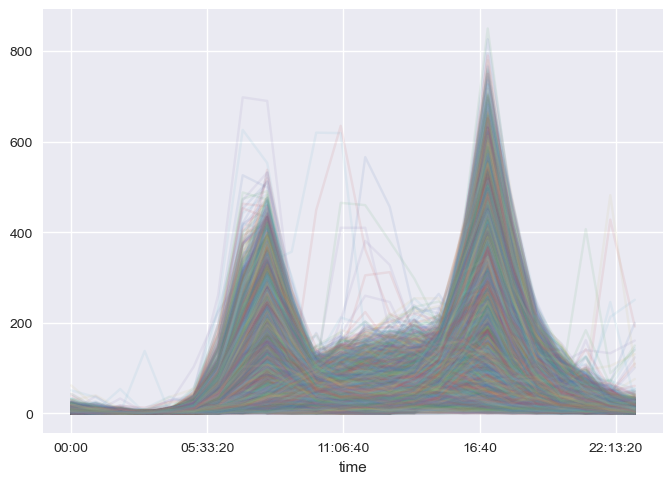

In [6]:
# Step 3: Plot pivot table data
## Here we see the data doesn't have the two peaks, but instead just one...This is what we need to fix

pivoted.plot(legend=False, alpha=0.1)

In [7]:
# Step 4: Investigate the data
# This shows that there are now only 12 unique times b/c the AM and PM are no longer there

np.unique(bdata.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [8]:
# Step 5: Time to review data.py file and review where function went wrong...

## Review the first 24 entries of the fremont.csv file
## This displays the time is 12 hours and not 24, which means our strftime; We need to use I instead of H

!head -24 fremont.csv

Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
10/02/2012 01:00:00 PM,55,7,48
10/02/2012 02:00:00 PM,130,55,75
10/02/2012 03:00:00 PM,152,81,71
10/02/2012 04:00:00 PM,278,167,111
10/02/2012 05:00:00 PM,563,393,170
10/02/2012 06:00:00 PM,381,236,145
10/02/2012 07:00:00 PM,175,104,71
10/02/2012 08:00:00 PM,86,51,35
10/02/2012 09:00:00 PM,63,35,28
10/02/2012 10:00:00 PM,42,27,15
10/02/2012 11:00:00 PM,13,9,4
10/03/2012 12:00:00 AM,13,9,4
10/03/2012 01:00:00 AM,10,6,4
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,3,2
10/03/2012 04:00:00 AM,7,1,6
10/03/2012 05:00:00 AM,31,10,21
10/03/2012 06:00:00 AM,155,50,105
10/03/2012 07:00:00 AM,352,95,257
10/03/2012 08:00:00 AM,437,146,291
10/03/2012 09:00:00 AM,276,104,172
10/03/2012 10:00:00 AM,118,46,72
10/03/2012 11:00:00 AM,42,32,10


In [9]:
# Step 6: Create test to ensure this time format error doesn't occur again...

## via $ nano jworkflow_pkg/tests/test_data.py
## assert len(np.unique(bdata.index.time)) == 24 -> counts the length to suggests there are 24 unique hours

### Part 8.5 - Finding and Fixing SKlearn Bugs

In [10]:
# Step 7: Display the shape of the pivoted data

pivoted.shape

(24, 4290)

In [11]:
# Step 7: Display the shape of the pivoted data transposed
## Think in terms of 2036 observations and each observation includes 24 hours (i.e features)
## Review the PCA - Principal Component Analysis from sklearn

pivoted.T.shape

(4290, 24)

In [12]:
# Step 8: import PCA

from sklearn.decomposition import PCA
import sklearn

In [13]:
# Step 9: Convert pivoted into numpy array
## Use fillna(0) to fill in missing data

X = pivoted.fillna(0).T.values
X.shape

(4290, 24)

In [14]:
# Step 10: Conduct PCA to limit features to 2
## (optional) use svd_solver='dense'

PCA(2).fit(X)

PCA(n_components=2)

In [15]:
# Step 11: Try fitting the two-dimensional X value

X2 = PCA(2).fit_transform(X)

In [16]:
X2

array([[-151.23288856, -124.41786574],
       [  88.70641887,  209.35101541],
       [  47.22956082,  194.13959879],
       ...,
       [  59.78885804,  -68.84002206],
       [-146.47642424, -103.82253629],
       [-111.57338893, -137.08608281]])

In [17]:
# Side Conversation - Opening Pull Request in SciPy

## Step 1: Navigate to Repo
## Step 2: $ git pull upstream master -> gets us up-to-date with master repo
## Step 3: $ git checkout - b fix-pca-validation -> Creat new branch to fix element
## Step 4: Navigate file in question and update section of code with issue and save
## Step 5: $ git status -> This confirms what we modified
## Step 6: Provided notes for pull request "BUG: fix x, y, z and a, b c"
## Step 7: $ git log -> to review the notes were updated
## Step 8: $ git push origin NameOfBranchToFixBugError -> This pushes branch to main repo for review and approval
## Step 9: Review recent changes on Github

### Part 9 - Data Exploration and practice with PCA and GMM

In [18]:
### Step 12: Review the two-dimensional array created from the PCA

X2.shape

(4290, 2)

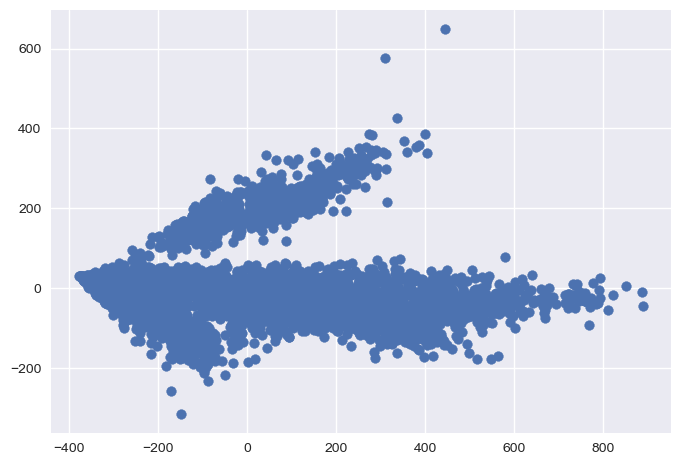

In [19]:
### Step 13: Create a scatter plot to compare the two data sets

## The clusters suggests 2 unique type of days

plt.scatter(X2[:, 0], X2[:,1])

In [20]:
### Step 14: Import Gaussian Mixture model to investigate the PCA plot

## Specify 2 -> for two clusters

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)

In [21]:
### Step 15: Fit the model and then make predictions
## The labels will identify if we are in the 0 or 1 cluster

gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 1, 1])

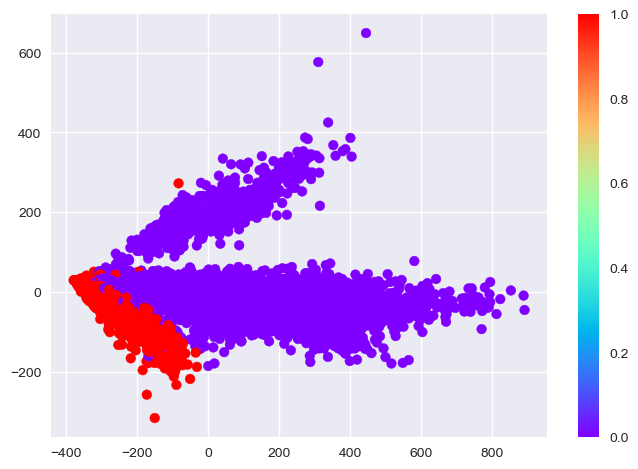

In [22]:
### Step 16: Reproduce the scatter plot with divider of labels
## Provides clear separation of clusters

plt.scatter(X2[:, 0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

<Axes: xlabel='time'>

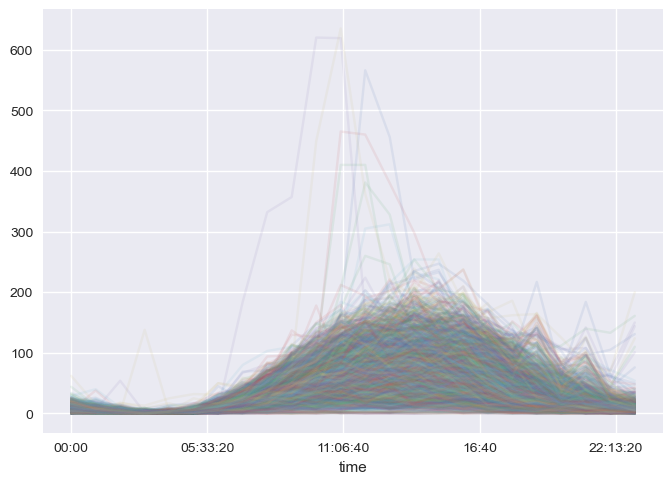

In [23]:
### Step 17: Dissect just a portion of the data
## The red cluster has a high peak commuter pattern displayed (Commute days)

pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

<Axes: xlabel='time'>

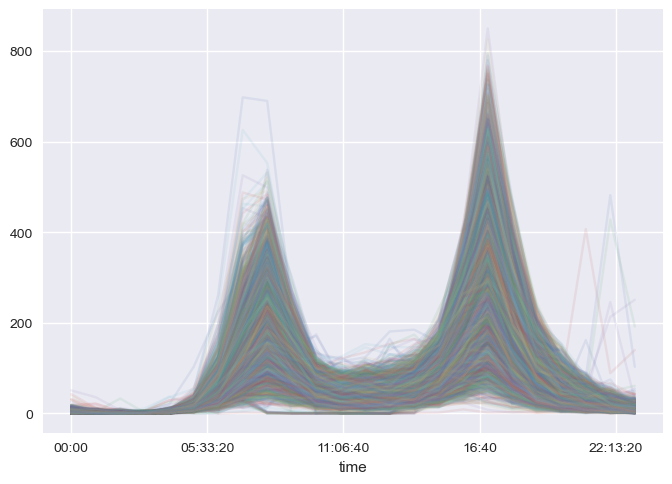

In [25]:
### Step 18: Dissect just a portion of the data
## The purple cluster has a more even distribution (Non-commute days)

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)

In [26]:
### Step 19: Convert dates into days of the week 

# a) convert object into DatetimeIndex
pd.DatetimeIndex(pivoted.columns)

DatetimeIndex(['2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05',
               '2012-10-06', '2012-10-07', '2012-10-08', '2012-10-09',
               '2012-10-10', '2012-10-11',
               ...
               '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-06-29', '2024-06-30'],
              dtype='datetime64[ns]', length=4290, freq=None)

In [27]:
### Step 20: Use the day of week attribure of the datetime64 object 

dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

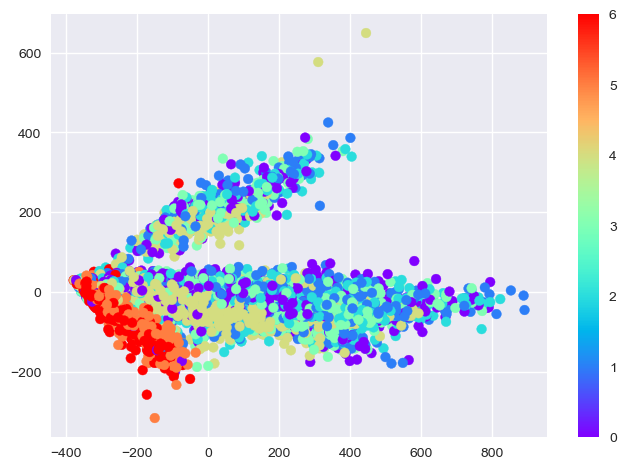

In [28]:
### Step 21: Plot the graph with day of week as coloration


plt.scatter(X2[:, 0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [29]:
### Step 22: Look deeper into the data for non-weekdays that look like non-commute days
## We see the a pattern of mostly holidays


dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05',
               '2012-10-08', '2012-10-09', '2012-10-10', '2012-10-11',
               '2012-10-12', '2012-10-15',
               ...
               '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
               '2024-06-21', '2024-06-24', '2024-06-25', '2024-06-26',
               '2024-06-27', '2024-06-28'],
              dtype='datetime64[ns]', length=2953, freq=None)

### Process
* Data Exploration
* Converting Exploration into Notebook
* Adding tools to packages